# spmlab
### Installation
spmlab can easily be installed like any other python package using pip
```bash
pip install spmlab
```

## We can read .sm4 files with the sm4 module

In [1]:
from spmlab.formats import sm4

### The sm4 module contains a function 'read' that takes in a source path as argument
The read function returns an object that contains the .sm4 data and has methods relevant to the type of data contained in the .sm4 file.

sm4.read() will return either an ImageData, STSData, or IZData object, depending on the type of data contained in the path.

This example returns an STSData object:

In [2]:
fname = r"data\BP 10K_2023_09_22_13_33_51_229.sm4"
sts = sm4.read(fname)

# Note how we used a raw string for the source path by putting an r in front of the double quotes
# Back slashes act as escape characters in python strings and will result in errors.
# Alternativally, you can use double back slashes.

### black_phosphorus_sts_ndr.sm4 contains scanning tunneling spectroscopy data from a BP sample
We can visualize this data in either waterfall or matrix form

(<Figure size 800x800 with 1 Axes>, <Axes: >)

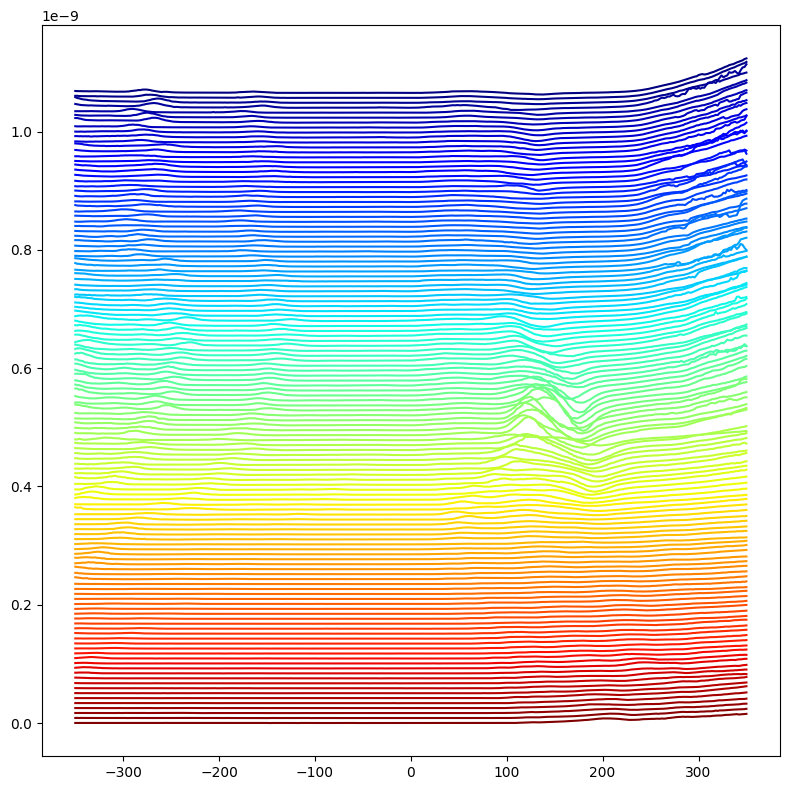

In [3]:
sts.waterfall()

(<Figure size 1600x700 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x28b324e42f0>)

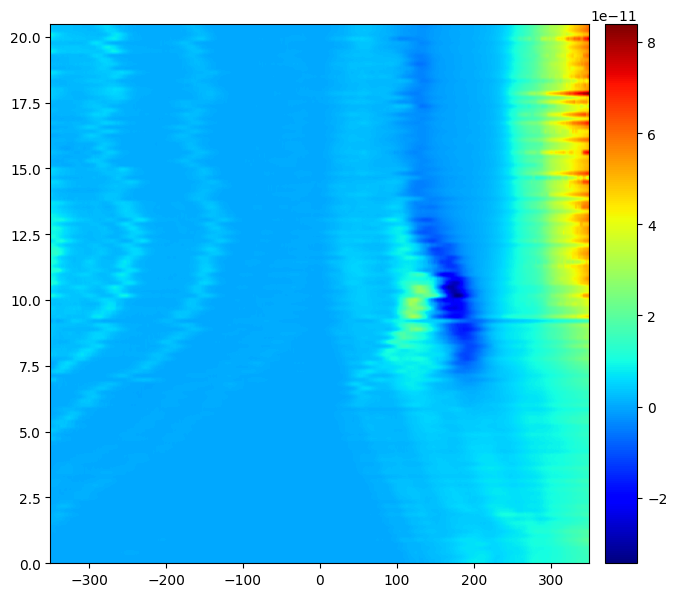

In [4]:
sts.matrix()

### As you can see from the return signatures, both the waterfall and matrix functions return a figure and axes object and matrix also returns a reference to the colorbar.

# Waterfall
waterfall() can take three arguments:
- figsize: a tuple, the width and height of the figure
- spacing: a float, the spacing between adjacent plots. 
    - default is 1/10 of the maximum value of all plots
- cmap: matplotlib color map object
    - default is matplotlib.pyplot.cm.jet

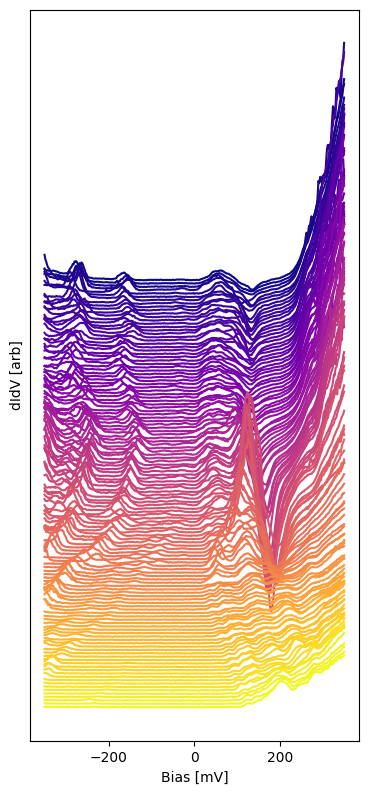

In [5]:
from spmlab.formats import sm4
import matplotlib.pyplot as plt

sts = sm4.read(r"data\BP 10K_2023_09_22_13_33_51_229.sm4")
fig, ax = sts.waterfall(figsize=(4, 8), spacing=1e-12, cmap=plt.cm.plasma)
plt.xlabel("Bias [mV]")
plt.ylabel("dIdV [arb]")
plt.yticks([]);

# Matrix
matrix() can take 8 arguments:
- as_linecut (bool): Whether to display ticks and labels as spectral linecut data
- aspect (float or None): The aspect ratio of the plot. If `None`, the aspect ratio is automatically set 
                          based on the voltage range and the length of the line cut.
- norm (matplotlib.colors.Normalize or None): Normalization for the colormap scaling. If `None`, no normalization is applied.
- cmap (str or matplotlib.colors.Colormap): The colormap to be used for displaying the data (default is plt.cm.jet).
- color_bar (bool): If `True`, a color bar will be displayed alongside the image (default is `True`).
- vmax (float or None): The maximum value for the colormap. If `None`, the maximum value in the data is used.
- clip_max (float or None): If provided, values above this threshold will be clipped to `clip_max`.
- clip_min (float or None): If provided, values below this threshold will be clipped to `clip_min`.

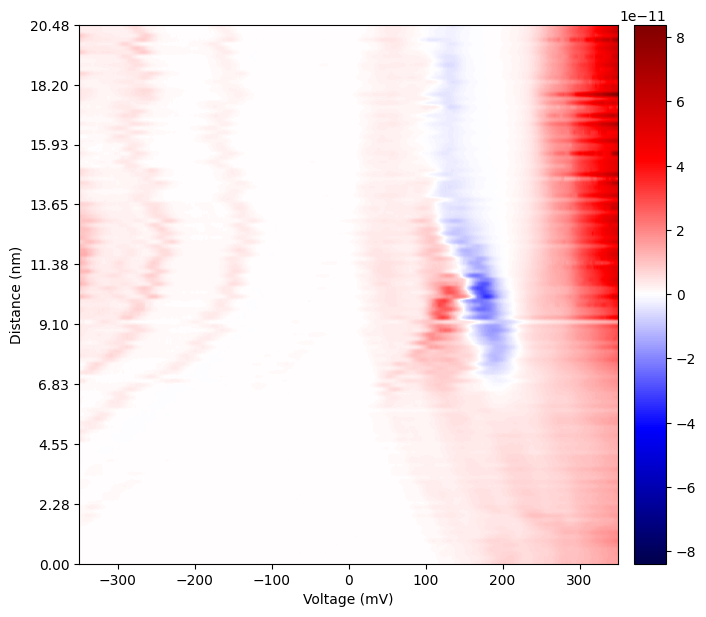

In [6]:
from spmlab.formats import sm4
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm

sts = sm4.read(r"data\BP 10K_2023_09_22_13_33_51_229.sm4")
fig, ax, cb = sts.matrix(as_linecut=True, norm=CenteredNorm(), cmap=plt.cm.seismic)

### Plotting STS coordinates on topography image
The STSData object also has a coordinates() funciton to plot the position of each spectra over a topography image.
The coordinates function can take a file path as an argument but will default to finding the most recent complete image (requires the regular LEWIS file formatting)

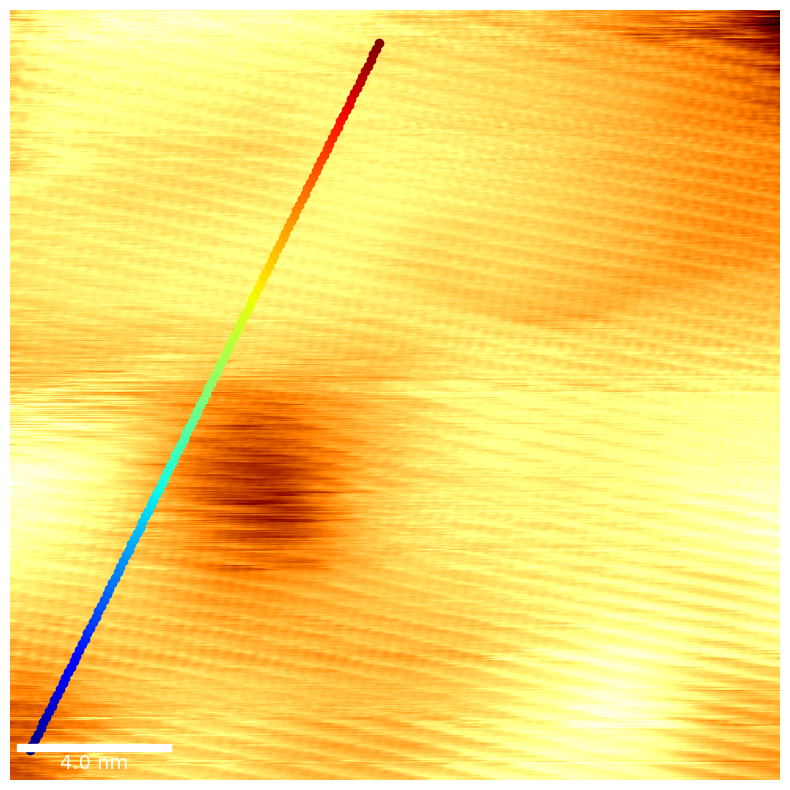

In [7]:
from spmlab.formats import sm4

sts = sm4.read(r"data\BP 10K_2023_09_22_13_33_51_229.sm4")
fig, ax = sts.coordinates()

We can plot the coordinates as a line cut arrow, show the spatial axes, change the scale bar height or remove it entirely, and change the color map

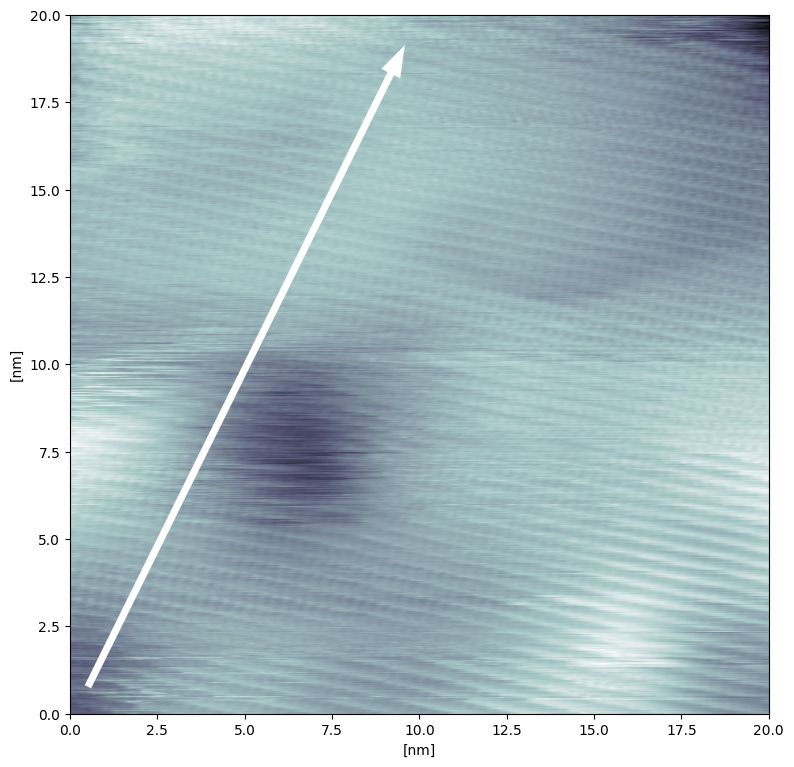

In [8]:
from spmlab.formats import sm4

sts = sm4.read(r"data\BP 10K_2023_09_22_13_33_51_229.sm4")
fig, ax = sts.coordinates(arrow=True, show_axis=True, show_scalebar=False, cmap='bone')

### The STSData object has an attribute called ds, which is an xarray Dataset that contains all the data read from the file:

In [9]:
print(sts.ds)

<xarray.DataArray 'LIA_Current' (LIA_Current_x: 351, LIA_Current_y: 512)> Size: 1MB
array([[3.29155939e-12, 2.57991253e-12, 2.42387874e-12, ...,
        1.54762528e-13, 7.75139774e-14, 8.92486418e-14],
       [3.41267789e-12, 2.90700698e-12, 2.45333648e-12, ...,
        1.65947712e-13, 1.62036157e-13, 4.12343067e-14],
       [3.46902756e-12, 2.78972088e-12, 2.51645686e-12, ...,
        1.05574726e-13, 1.66217795e-13, 9.05571500e-14],
       ...,
       [5.46270419e-11, 5.51581240e-11, 5.50120786e-11, ...,
        1.65099789e-11, 1.34343886e-11, 1.40260345e-11],
       [5.62643070e-11, 5.68638832e-11, 5.81342630e-11, ...,
        1.72252440e-11, 1.36450584e-11, 1.39089207e-11],
       [5.81822494e-11, 5.80684977e-11, 5.77934921e-11, ...,
        1.75030948e-11, 1.40501930e-11, 1.35733885e-11]])
Coordinates:
  * LIA_Current_x  (LIA_Current_x) float64 3kB -0.35 -0.348 ... 0.348 0.35
  * LIA_Current_y  (LIA_Current_y) uint32 2kB 0 1 2 3 4 ... 507 508 509 510 511
Attributes: (12/146)
    RH

The file is read using a local fork of a package called spym. 
The resulting format of the Dataset can be difficult to parse at first, and is **not required to use this package**, but is simple:

- Data: the actual measured (y-axis) data
- Dimensions: the size of each "data variable" vector
- Coordinates: the xaxis values for each "data variable" vector
    - Each coordinate has additional attributes which include the physical units and global offset
    - Typically the y coordinates end up being indices for the LIA or Current data (index for each sweep)
- Attributes: a lot of metadata including:
    - Global x and y offsets
    - Local coordindates
    - bias and setpoint
    - how the data should be interpreted (iz data is an exception)
    - date and start time
    - etc 